In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
test_df = pd.read_csv('test.csv',index_col =0)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
test_df.shape

(418, 10)

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [5]:
test_df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [6]:
test_df.columns

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked'],
      dtype='object')

# Data Cleaning

In [7]:
#Copy the original dataset we won't change it now
df = test_df.copy()

In [8]:
#Check for duplicates
print(f"Number of duplicated values = {df.duplicated().sum()}")

Number of duplicated values = 0


In [9]:
#Check for Nan values
df.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
Embarked      0
dtype: int64

In [10]:
#Drop unnecessary columns
del df['Cabin']

In [11]:
df.isna().sum()

Pclass       0
Name         0
Sex          0
Age         86
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
dtype: int64

**We need to explore the rows that have nan values to determine why are there nan values?**

In [12]:
people_without_age = df[df['Age'].isna()]
people_without_age

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,
902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,S
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,S
921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,C
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,S
928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,S
...,...,...,...,...,...,...,...,...,...
1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S


**As you see from `Name` column almost every name has `Miss.` or `Mr.`**
**so we can predict their ages older than 24**

In [13]:
#Let's See how many Miss. or Mr. in these entries
count = people_without_age['Name'].str.contains(r"\b(Miss\.|Mr\.)").sum()
print(f"Number of people that ages older 24 : {count}")

Number of people that ages older 24 : 71


C:\Users\mo3az\AppData\Local\Temp\ipykernel_17508\123441451.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  count = people_without_age['Name'].str.contains(r"\b(Miss\.|Mr\.)").sum()


In [14]:
#What is the Average Ages and Standard deviation ?
print(f"Age Average = {df['Age'].mean()}")
print (f"Age Standard deviation = {df['Age'].std()}")

Age Average = 30.272590361445783
Age Standard deviation = 14.181209235624422


**The understanding of Missing Values gives us a good note,**
**That is the minimum Age of the `people_without_ages` maybe 24,**
**So it's better to fill the missing value with `mean` instead of `std`**

In [15]:
#We can fill the Age and Fare by mean values
df[['Age','Fare']] = df[['Age','Fare']].fillna(df[['Age','Fare']].mean())

In [16]:
df.isna().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

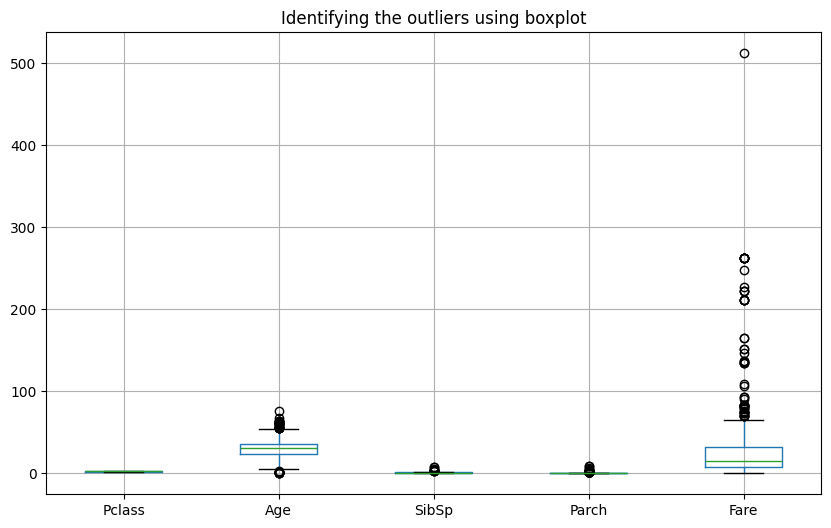

In [17]:
#Now we can check for the outliers
plt.figure(figsize=(10,6))
df.boxplot()
plt.title('Identifying the outliers using boxplot')
plt.show()

**As you see from the box plots we have outliers in some columns**
**such as (`Age`, `SibSp`, `Fare`)**

In [18]:
#We can define a function to handle the outliers for us
def handle_outliers(column):
    Q1 = column.quantile(.25)
    Q3 = column.quantile(.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - (1.5*IQR)
    upper_limit = Q3 + (1.5*IQR)
    return column[(column >= lower_limit) & (column <= upper_limit)]

In [19]:
numeric_cols = df.select_dtypes(include=[np.number])
non_numeric_cols = df.select_dtypes(include=['O'])

In [20]:
filtered_numeric_df =numeric_cols.apply(handle_outliers)
df = pd.concat([filtered_numeric_df, non_numeric_cols], axis=1)

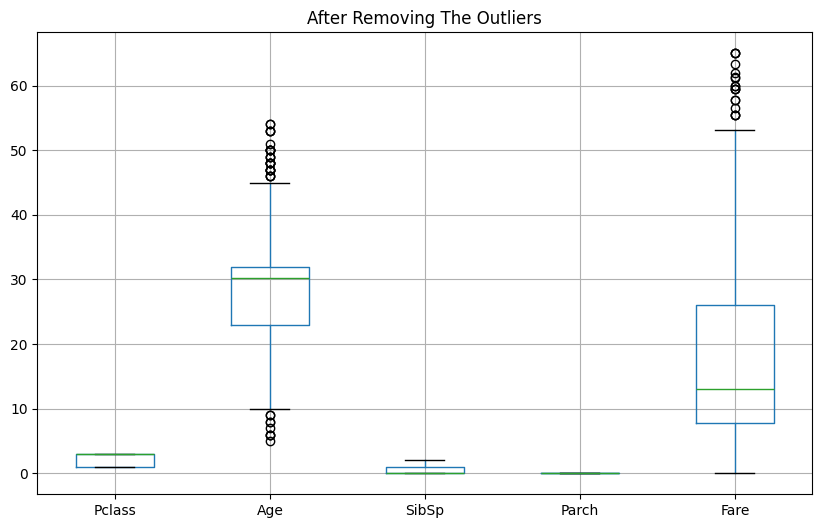

In [21]:
plt.figure(figsize=(10,6))
df.boxplot()
plt.title('After Removing The Outliers')
plt.show()

**After we removed the outliers, some missing values will start to appear again so we can fill it with the mean**

In [22]:
df.isna().sum()

Pclass       0
Age         36
SibSp       11
Parch       94
Fare        55
Name         0
Sex          0
Ticket       0
Embarked     0
dtype: int64

In [23]:
cols = ['Age','SibSp','Parch','Fare']
df[cols]=df[cols].fillna(df[cols].mean())

In [24]:
df.isna().sum()

Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Name        0
Sex         0
Ticket      0
Embarked    0
dtype: int64

In [25]:
#Compare between the original and cleaned datasets
print(f"Original dataset shape : {test_df.shape}")
print(f"Cleaned dataset shape : {df.shape}")

Original dataset shape : (418, 10)
Cleaned dataset shape : (418, 9)


In [26]:
#ٍSave The cleaned dataset
df.to_csv(r'cleaned_test.csv')